In [4]:
# finding source location
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        src = os.path.join(dirname, filename)
        
# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# reading data
import numpy as np
import pandas as pd

df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
# getting column names
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [7]:
# getting dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [8]:
# looking at statistical info of the numerical columns

df[['fare_amount', 'passenger_count']].describe()

,fare_amount,passenger_count
count,200000.000000,200000.000000
mean,11.359955,1.684535
std,9.901776,1.385997
min,-52.000000,0.000000
25%,6.000000,1.000000
50%,8.500000,1.000000
75%,12.500000,2.000000
max,499.000000,208.000000


In [9]:
# checking for null values
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [10]:
# drop null values
df = df.dropna()
df = df.reset_index(drop=True)

# check again for null values
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
# checking for duplicate values
df.duplicated().sum()

0

In [12]:
# selecting columns
df = df[['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'fare_amount']]
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,7.5
1,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,7.7
2,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,12.9
3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,5.3
4,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,16.0


- Parsing **`DateTime`**

In [13]:
# convert the 'datetime' column to pandas datetime
df['datetime'] = pd.to_datetime(df['pickup_datetime'], utc=True)

# extract the components
df['weekday'] = df['datetime'].dt.weekday
df['date'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['hour'] = df['datetime'].dt.hour

# display the result
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,datetime,weekday,date,month,year,hour
0,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,7.5,2015-05-07 19:52:06+00:00,3,7,5,2015,19
1,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,7.7,2009-07-17 20:04:56+00:00,4,17,7,2009,20
2,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,12.9,2009-08-24 21:45:00+00:00,0,24,8,2009,21
3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,5.3,2009-06-26 08:22:21+00:00,4,26,6,2009,8
4,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,16.0,2014-08-28 17:47:00+00:00,3,28,8,2014,17


- Rearranging columns

In [14]:
# selecting columns
df = df[['hour', 'weekday', 'date', 'month', 'year', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'fare_amount']]
df.head()

,hour,weekday,date,month,year,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,19,3,7,5,2015,-73.999817,40.738354,-73.999512,40.723217,1,7.5
1,20,4,17,7,2009,-73.994355,40.728225,-73.994710,40.750325,1,7.7
2,21,0,24,8,2009,-74.005043,40.740770,-73.962565,40.772647,1,12.9
3,8,4,26,6,2009,-73.976124,40.790844,-73.965316,40.803349,3,5.3
4,17,3,28,8,2014,-73.925023,40.744085,-73.973082,40.761247,5,16.0


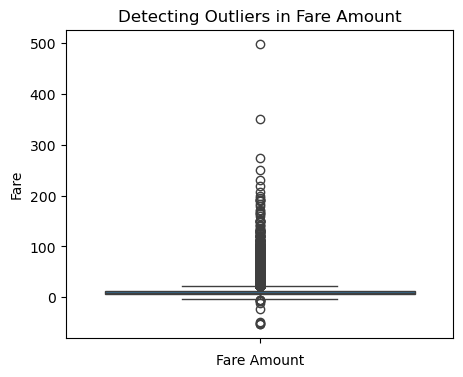

In [15]:
#checking for outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.boxplot(data= df['fare_amount'])
plt.xlabel('Fare Amount')
plt.ylabel('Fare')
plt.title('Detecting Outliers in Fare Amount')
plt.show()

We can see that there are values even below 0, we will remove them first.

In [16]:
df = df[df['fare_amount']>0]
df = df.reset_index(drop=True)

df.head()

,hour,weekday,date,month,year,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,19,3,7,5,2015,-73.999817,40.738354,-73.999512,40.723217,1,7.5
1,20,4,17,7,2009,-73.994355,40.728225,-73.994710,40.750325,1,7.7
2,21,0,24,8,2009,-74.005043,40.740770,-73.962565,40.772647,1,12.9
3,8,4,26,6,2009,-73.976124,40.790844,-73.965316,40.803349,3,5.3
4,17,3,28,8,2014,-73.925023,40.744085,-73.973082,40.761247,5,16.0


Now, we remove the outliers with the **`inter-quartile range`** substitution method.

In [17]:
# function to remove outliers using the IQR method
def remove_outliers(df, columns):
    
    # looping through each column
    for col in columns:
        feature = df[col]
        q1 = feature.quantile(0.25)
        q3 = feature.quantile(0.75)
        IQR = q3 - q1
        lower_bound = float(q1 - 1.5 * IQR)  # Cast to float
        upper_bound = float(q3 + 1.5 * IQR)  # Cast to float

        # replacing outliers with bounds
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

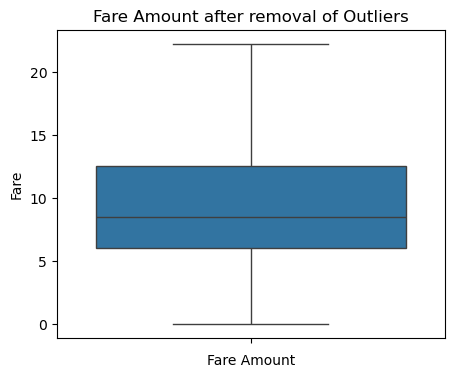

In [18]:
# remove outliers
df = remove_outliers(df, ['fare_amount'])

# plotting the boxplot for cleaned data
plt.figure(figsize=(5, 4))
sns.boxplot(data=df['fare_amount'])
plt.xlabel('Fare Amount')
plt.ylabel('Fare')
plt.title('Fare Amount after removal of Outliers')
plt.show()

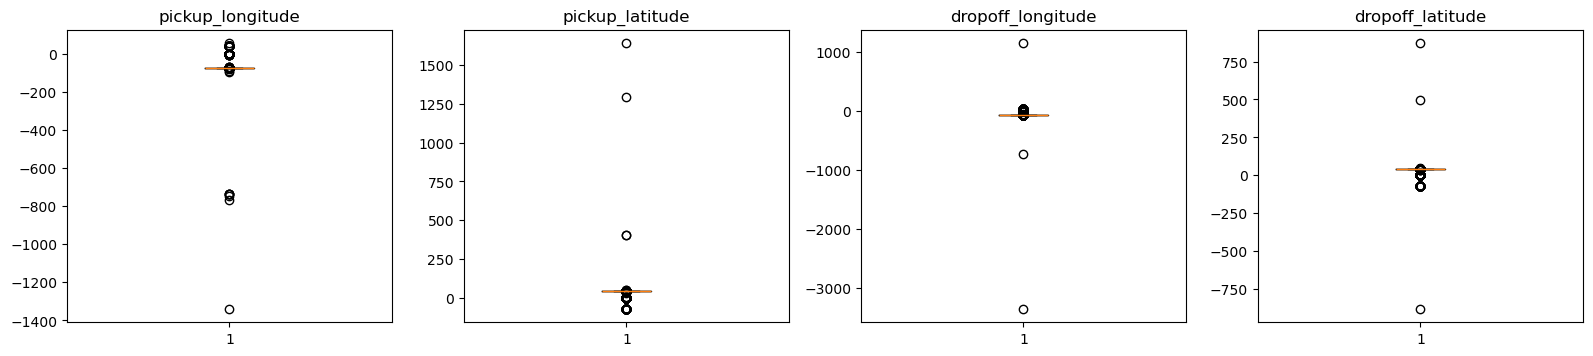

In [19]:
# outliers detection using boxplot
plt.figure(figsize =(20, 20))

for i , variable in enumerate(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']):
    plt.subplot(6 , 5, i +1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
    
plt.show()

Clearly the coordinates are outside of possible range, so we remove the ones that are out of possible range!

In [20]:
# setting possible range for longitudes
longitude_up = 180
longitude_down = -180

# setting possible range for latitudes
latitude_up = 90
latitude_down = -90

# choosing only the ones that fall inside the possible range
df = df[(df['pickup_longitude']  >= longitude_down) & 
        (df['dropoff_longitude'] >= longitude_down) & 
        (df['pickup_longitude']  <= longitude_up)   &
        (df['dropoff_longitude'] <= longitude_up)   &
        (df['pickup_latitude']   >= latitude_down)  & 
        (df['dropoff_latitude']  >= latitude_down)  & 
        (df['pickup_latitude']   <= latitude_up)    &
        (df['dropoff_latitude']  <= latitude_up)]

df.head()

,hour,weekday,date,month,year,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,19,3,7,5,2015,-73.999817,40.738354,-73.999512,40.723217,1,7.5
1,20,4,17,7,2009,-73.994355,40.728225,-73.994710,40.750325,1,7.7
2,21,0,24,8,2009,-74.005043,40.740770,-73.962565,40.772647,1,12.9
3,8,4,26,6,2009,-73.976124,40.790844,-73.965316,40.803349,3,5.3
4,17,3,28,8,2014,-73.925023,40.744085,-73.973082,40.761247,5,16.0


Now, we can check for **`outliers`**.

### **🚧 Removing Coordinate Outliers**

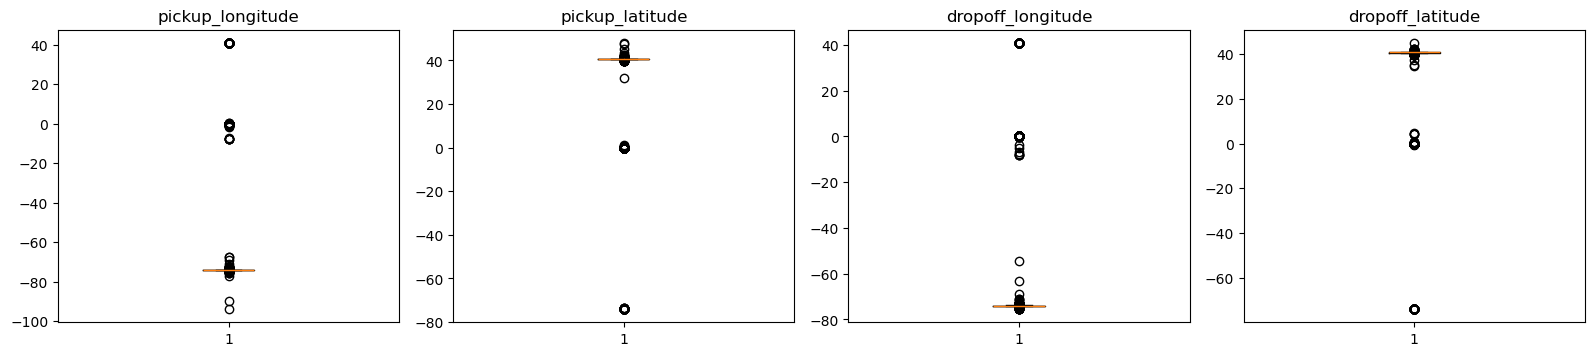

In [21]:
# outliers detection using boxplot
plt.figure(figsize =(20, 20))

for i , variable in enumerate(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']):
    plt.subplot(6 , 5, i +1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
    
plt.show()

We can clearly see that there are a huge number of outliers in each column.

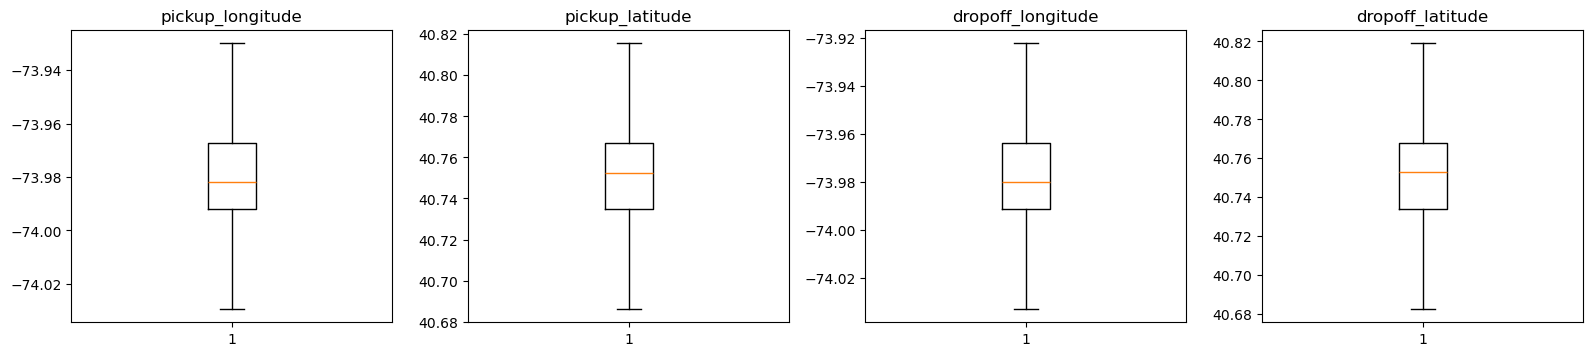

In [22]:
# remove outliers
df = remove_outliers(df, ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])

plt.figure(figsize =(20, 20))

for i , variable in enumerate(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']):
    plt.subplot(6 , 5, i +1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
    
# plot boxplot of cleaned coordinate data 
plt.show()

## **⚡ Generating Distance from Coordinate Data**
We now use the **`Haversine formula`** to calculate the great-circle distance between two points on the Earth's surface given their longitude and latitude in degrees. This formula is particularly useful for calculating distances over the globe's surface, accounting for its spherical shape.

In [23]:
from math import radians, sin, cos, asin, sqrt

# function to calculate the travel distance from the longitudes and latitudes
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [24]:
# generating distance
df['distance'] = distance_transform(
    df['pickup_longitude'].to_numpy(), 
    df['pickup_latitude'].to_numpy(),
    df['dropoff_longitude'].to_numpy(), 
    df['dropoff_latitude'].to_numpy()
)

df.head()

,hour,weekday,date,month,year,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,distance
0,19,3,7,5,2015,-73.999817,40.738354,-73.999512,40.723217,1,7.5,1.683323
1,20,4,17,7,2009,-73.994355,40.728225,-73.994710,40.750325,1,7.7,2.457590
2,21,0,24,8,2009,-74.005043,40.740770,-73.962565,40.772647,1,12.9,5.036377
3,8,4,26,6,2009,-73.976124,40.790844,-73.965316,40.803349,3,5.3,1.661683
4,17,3,28,8,2014,-73.929790,40.744085,-73.973082,40.761247,5,16.0,4.115803


## ** Cleaning Distance**

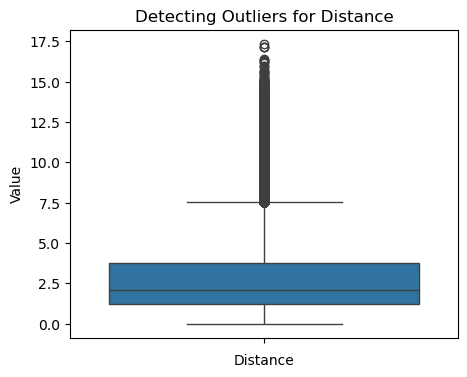

In [25]:
# checking outliers for distance
plt.figure(figsize=(5, 4))
sns.boxplot(data=df['distance'])
plt.xlabel('Distance')
plt.ylabel('Value')
plt.title('Detecting Outliers for Distance')
plt.show()

Clearly, there is a large nnumber of outliers, so we remove them.

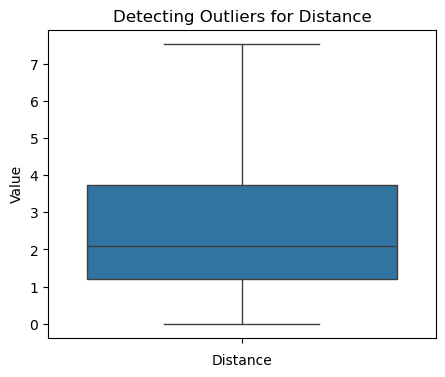

In [26]:
# remove outliers
df = remove_outliers(df, ['distance'])

plt.figure(figsize=(5, 4))
sns.boxplot(data=df['distance'])
plt.xlabel('Distance')
plt.ylabel('Value')
plt.title('Detecting Outliers for Distance')
plt.show()

## **☑ Boxing Coordinates**
Now, we will design a custom box system of size 500m x 500m. We will assign all the coordinates within this box a specific number. We will do this for the entire dataset. We will be using **`UTM`** (Universal Transverse Mercator) coordinates and then assigning these coordinates to unique box IDs.

In [27]:
import subprocess
import sys

try:
    import utm
except ImportError:
    print("utm module not found. Installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "utm"])
    print('utm module installed successfully.')

In [28]:
import utm

# Function to convert lat/lon to UTM coordinates
def convert_to_utm(lat, lon):
    u = utm.from_latlon(lat, lon)
    return u[0], u[1]

# Function to assign a box based on UTM coordinates and box size
def assign_box(lat, lon, box_size, mapping_dict):
    utm_x, utm_y = convert_to_utm(lat, lon)
    box_x = int(utm_x // box_size)
    box_y = int(utm_y // box_size)
    box_id = box_x * 1e6 + box_y
    mapping_dict[(lat, lon)] = box_id
    return box_id

# Box size in meters
box_size = 500

# Create data mappings for pickup and dropoff locations
pickup_mapping = {}
dropoff_mapping = {}

# Assign box numbers and save mappings
df['pickup'] = df.apply(lambda row: assign_box(row['pickup_latitude'], row['pickup_longitude'], box_size, pickup_mapping), axis=1)
df['dropoff'] = df.apply(lambda row: assign_box(row['dropoff_latitude'], row['dropoff_longitude'], box_size, dropoff_mapping), axis=1)

df.head()

,hour,weekday,date,month,year,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,distance,pickup,dropoff
0,19,3,7,5,2015,-73.999817,40.738354,-73.999512,40.723217,1,7.5,1.683323,1.168009e+09,1.168009e+09
1,20,4,17,7,2009,-73.994355,40.728225,-73.994710,40.750325,1,7.7,2.457590,1.169009e+09,1.169009e+09
2,21,0,24,8,2009,-74.005043,40.740770,-73.962565,40.772647,1,12.9,5.036377,1.168009e+09,1.175009e+09
3,8,4,26,6,2009,-73.976124,40.790844,-73.965316,40.803349,3,5.3,1.661683,1.172009e+09,1.174009e+09
4,17,3,28,8,2014,-73.929790,40.744085,-73.973082,40.761247,5,16.0,4.115803,1.180009e+09,1.173009e+09


In [29]:
# selecting required columns only
df = df[['hour','weekday', 'date', 'month', 'year', 'passenger_count','pickup', 'dropoff', 'distance', 'fare_amount']]
df = df.reset_index(drop=True)

df.head()

,hour,weekday,date,month,year,passenger_count,pickup,dropoff,distance,fare_amount
0,19,3,7,5,2015,1,1.168009e+09,1.168009e+09,1.683323,7.5
1,20,4,17,7,2009,1,1.169009e+09,1.169009e+09,2.457590,7.7
2,21,0,24,8,2009,1,1.168009e+09,1.175009e+09,5.036377,12.9
3,8,4,26,6,2009,3,1.172009e+09,1.174009e+09,1.661683,5.3
4,17,3,28,8,2014,5,1.180009e+09,1.173009e+09,4.115803,16.0


## **📆 Simplifying Hour, Weekday, Month and Date**

### **🛹 Hours of the Day**

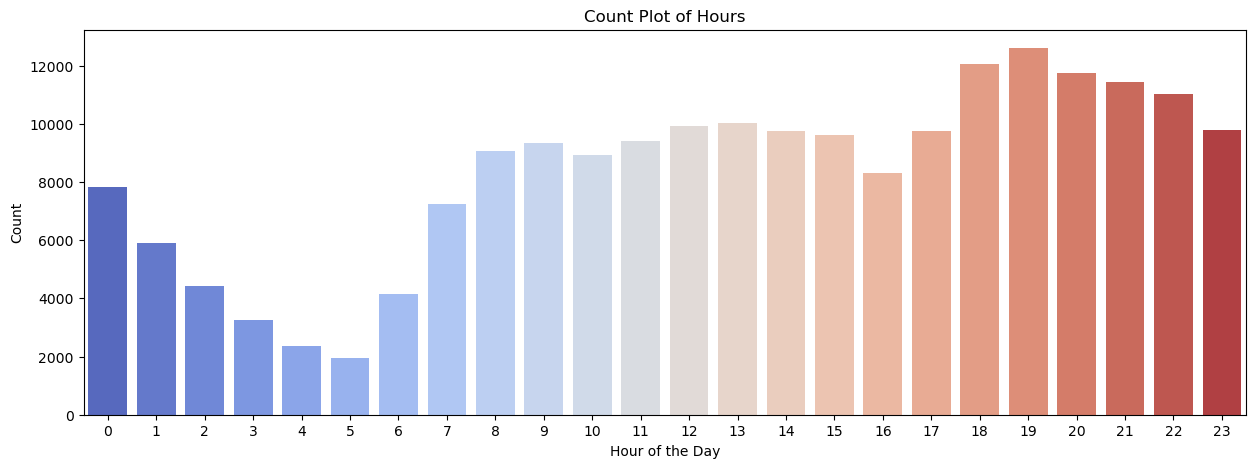

In [30]:
# Create the count plot for the hour
plt.figure(figsize=(15, 5))
sns.countplot(x='hour', data=df, palette='coolwarm')
plt.title('Count Plot of Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(range(24))
plt.show()

In [31]:
# Function to categorize hours
def categorize_hour(hour):
    if 0 <= hour <= 5:
        return 'Early Morning'
    elif 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 15:
        return 'Afternoon'
    elif 16 <= hour <= 21:
        return 'Evening'
    elif 22 <= hour <= 23:
        return 'Late Night'

# Apply the function to create a new column 'time_of_day'
df['time'] = df['hour'].apply(categorize_hour)
df = df.drop('hour', axis=1)

df.head()

,weekday,date,month,year,passenger_count,pickup,dropoff,distance,fare_amount,time
0,3,7,5,2015,1,1.168009e+09,1.168009e+09,1.683323,7.5,Evening
1,4,17,7,2009,1,1.169009e+09,1.169009e+09,2.457590,7.7,Evening
2,0,24,8,2009,1,1.168009e+09,1.175009e+09,5.036377,12.9,Evening
3,4,26,6,2009,3,1.172009e+09,1.174009e+09,1.661683,5.3,Morning
4,3,28,8,2014,5,1.180009e+09,1.173009e+09,4.115803,16.0,Evening


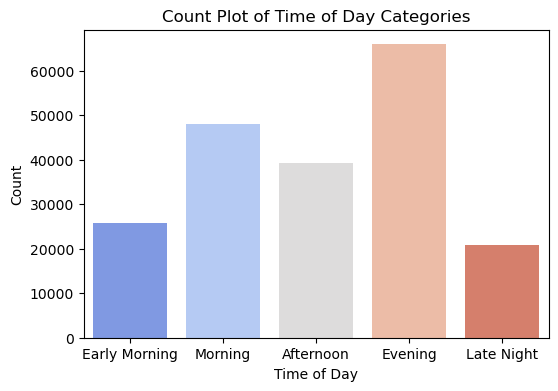

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(x='time', data=df, palette='coolwarm', order=['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Late Night'])
plt.title('Count Plot of Time of Day Categories')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()

### **⚓ Weekdays of the Month**

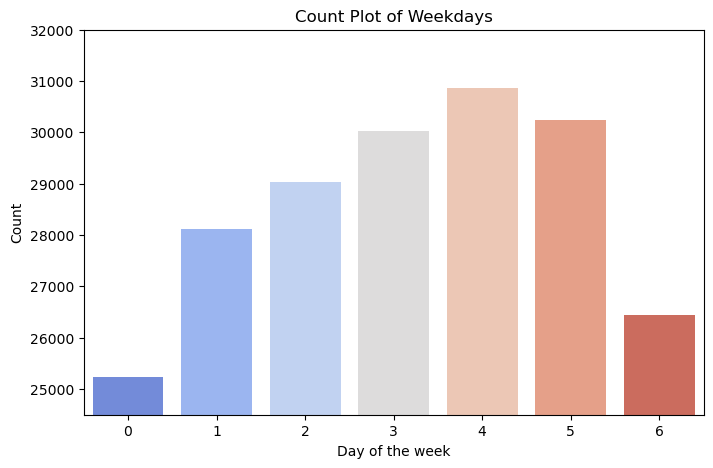

In [33]:
# Create the count plot for the days of the week
plt.figure(figsize=(8, 5))
sns.countplot(x='weekday', data=df, palette='coolwarm')
plt.title('Count Plot of Weekdays')
plt.xlabel('Day of the week')
plt.ylabel('Count')
plt.ylim(24500, 32000)
plt.xticks(range(7))
plt.show()

In [34]:
df['weekend'] = df['weekday'].isin([4, 5, 6]).astype(int)
df = df.drop('weekday', axis=1)

df.head()

,date,month,year,passenger_count,pickup,dropoff,distance,fare_amount,time,weekend
0,7,5,2015,1,1.168009e+09,1.168009e+09,1.683323,7.5,Evening,0
1,17,7,2009,1,1.169009e+09,1.169009e+09,2.457590,7.7,Evening,1
2,24,8,2009,1,1.168009e+09,1.175009e+09,5.036377,12.9,Evening,0
3,26,6,2009,3,1.172009e+09,1.174009e+09,1.661683,5.3,Morning,1
4,28,8,2014,5,1.180009e+09,1.173009e+09,4.115803,16.0,Evening,0


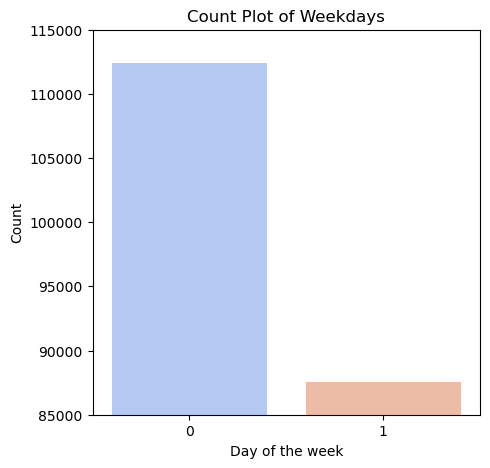

In [35]:
plt.figure(figsize=(5, 5))
sns.countplot(x='weekend', data=df, palette='coolwarm')
plt.title('Count Plot of Weekdays')
plt.xlabel('Day of the week')
plt.ylabel('Count')
plt.ylim(85000,115000)
plt.xticks(range(2))
plt.show()

### **🚋 Days of the Month**

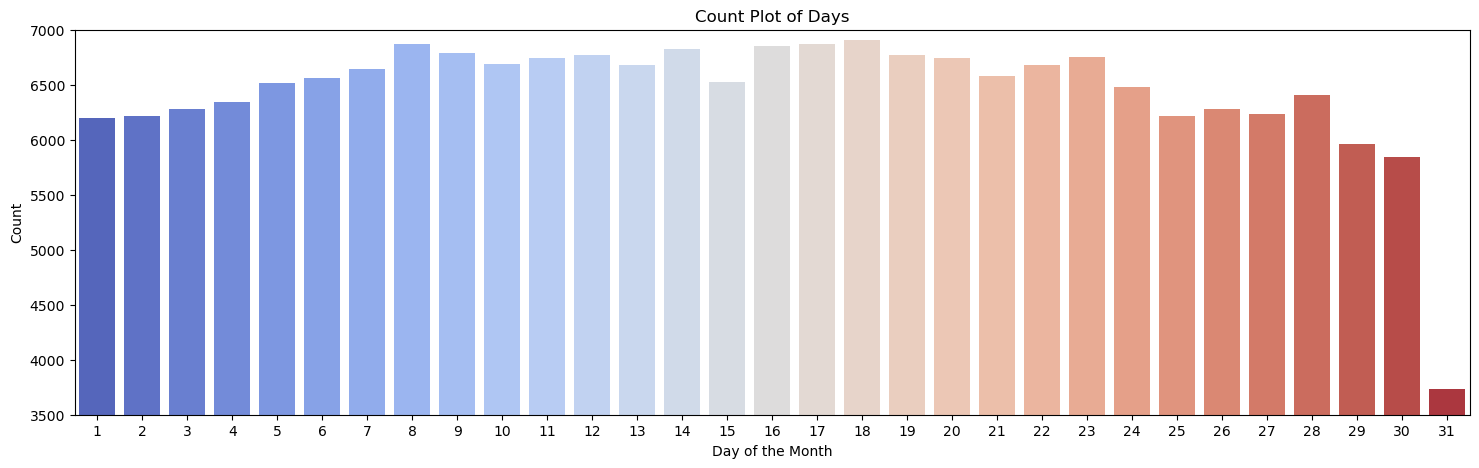

In [36]:
# Create the count plot for the days of the month
plt.figure(figsize=(18, 5))
sns.countplot(x='date', data=df, palette='coolwarm')
plt.title('Count Plot of Days')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.ylim(3500, 7000)
plt.xticks(range(31))
plt.show()

In [37]:
# Function to categorize days of the month
def categorize_date(date):
    if 0 <= date <= 10:
        return 'Early'
    elif 11 <= date <= 20:
        return 'Middle'
    elif 21 <= date <= 31:
        return 'End'

# Apply the function to create a new column 'time_of_day'
df['tri_monthly'] = df['date'].apply(categorize_date)
df = df.drop('date', axis=1)

df.head()

,month,year,passenger_count,pickup,dropoff,distance,fare_amount,time,weekend,tri_monthly
0,5,2015,1,1.168009e+09,1.168009e+09,1.683323,7.5,Evening,0,Early
1,7,2009,1,1.169009e+09,1.169009e+09,2.457590,7.7,Evening,1,Middle
2,8,2009,1,1.168009e+09,1.175009e+09,5.036377,12.9,Evening,0,End
3,6,2009,3,1.172009e+09,1.174009e+09,1.661683,5.3,Morning,1,End
4,8,2014,5,1.180009e+09,1.173009e+09,4.115803,16.0,Evening,0,End


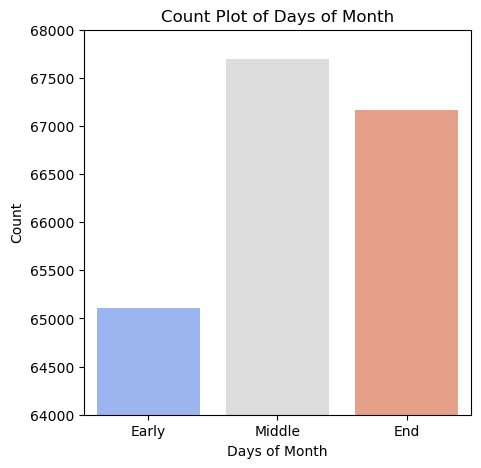

In [38]:
plt.figure(figsize=(5, 5))
sns.countplot(x='tri_monthly', data=df, palette='coolwarm')
plt.title('Count Plot of Days of Month')
plt.xlabel('Days of Month')
plt.ylabel('Count')
plt.ylim(64000,68000)
plt.xticks(range(3))
plt.show()

### **🚛 Months of the Year**

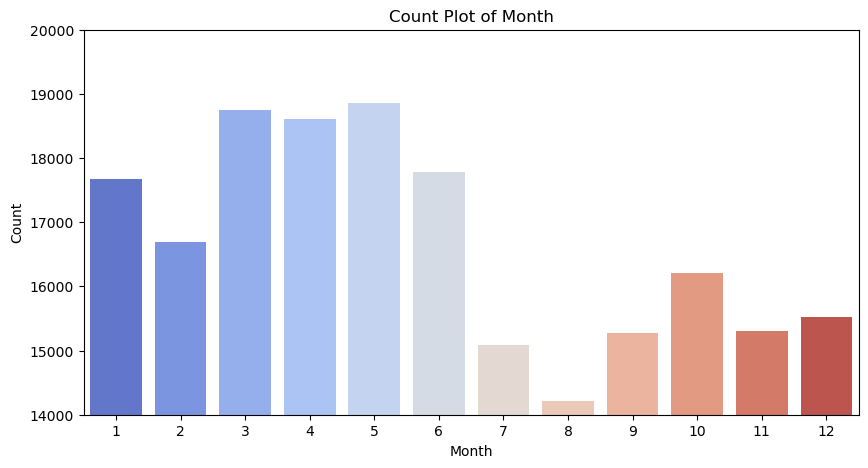

In [39]:
plt.figure(figsize=(10, 5))
sns.countplot(x='month', data=df, palette='coolwarm')
plt.title('Count Plot of Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.ylim(14000, 20000)
plt.xticks(range(12))
plt.show()

In [40]:
# function to categorize month of the year
def categorize_month(month):
    if 1 <= month <= 3:
        return 1
    elif 4 <= month <= 6:
        return 2
    elif 7 <= month <= 9:
        return 3
    elif 10 <= month <= 12:
        return 4
    
# apply the function to create a new column 'time_of_day'
df['year_quater'] = df['month'].apply(categorize_month)
df = df.drop('month', axis = 1)

df.head()

,year,passenger_count,pickup,dropoff,distance,fare_amount,time,weekend,tri_monthly,year_quater
0,2015,1,1.168009e+09,1.168009e+09,1.683323,7.5,Evening,0,Early,2
1,2009,1,1.169009e+09,1.169009e+09,2.457590,7.7,Evening,1,Middle,3
2,2009,1,1.168009e+09,1.175009e+09,5.036377,12.9,Evening,0,End,3
3,2009,3,1.172009e+09,1.174009e+09,1.661683,5.3,Morning,1,End,2
4,2014,5,1.180009e+09,1.173009e+09,4.115803,16.0,Evening,0,End,3


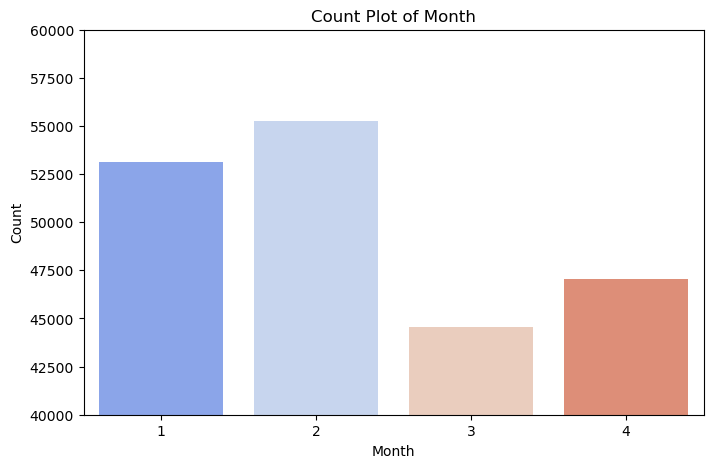

In [41]:
# Create the count plot for the hour
plt.figure(figsize=(8, 5))
sns.countplot(x='year_quater', data=df, palette='coolwarm')
plt.title('Count Plot of Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.ylim(40000, 60000)
plt.xticks(range(4))
plt.show()

In [42]:
df = df[['year', 'passenger_count', 'pickup', 'dropoff', 'time', 'weekend', 'year_quater', 'tri_monthly', 'distance', 'fare_amount']]

df.head()

,year,passenger_count,pickup,dropoff,time,weekend,year_quater,tri_monthly,distance,fare_amount
0,2015,1,1.168009e+09,1.168009e+09,Evening,0,2,Early,1.683323,7.5
1,2009,1,1.169009e+09,1.169009e+09,Evening,1,3,Middle,2.457590,7.7
2,2009,1,1.168009e+09,1.175009e+09,Evening,0,3,End,5.036377,12.9
3,2009,3,1.172009e+09,1.174009e+09,Morning,1,2,End,1.661683,5.3
4,2014,5,1.180009e+09,1.173009e+09,Evening,0,3,End,4.115803,16.0


### **🗻 Defining Categorical and Numerical Features**

In [43]:
cat_col = ['year', 'passenger_count', 'pickup', 'dropoff', 'time', 'weekend', 'year_quater', 'tri_monthly']
num_col = ['distance']

- Encoding `categorical` values

In [44]:
from sklearn.preprocessing import LabelEncoder

encoders = {}  # Dictionary to save the encoders

for col in cat_col:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder

df.head()

,year,passenger_count,pickup,dropoff,time,weekend,year_quater,tri_monthly,distance,fare_amount
0,6,1,115,121,2,0,1,0,1.683323,7.5
1,0,1,137,153,2,1,2,2,2.457590,7.7
2,0,1,115,332,2,0,2,1,5.036377,12.9
3,0,3,229,307,4,1,1,1,1.661683,5.3
4,5,5,453,268,2,0,2,1,4.115803,16.0


- Standardizing `numerical` values

In [45]:
# Standardizing Numerical Data with Standard Scaler
from sklearn.preprocessing import StandardScaler

scalers = {}  # Dictionary to save the scalers

for column in num_col:
    scaler = StandardScaler()
    df[column] = scaler.fit_transform(df[[column]])
    scalers[column] = scaler

df.head()

,year,passenger_count,pickup,dropoff,time,weekend,year_quater,tri_monthly,distance,fare_amount
0,6,1,115,121,2,0,1,0,-0.519210,7.5
1,0,1,137,153,2,1,2,2,-0.126730,7.7
2,0,1,115,332,2,0,2,1,1.180469,12.9
3,0,3,229,307,4,1,1,1,-0.530179,5.3
4,5,5,453,268,2,0,2,1,0.713825,16.0


In [46]:
# selecting features and target
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [47]:
# splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **↖ Linear Regression**

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression Results:')
print(f'Mean Absolute Error: {mae_linear}')
print(f'Mean Squared Error: {mse_linear}')
print(f'Root Mean Squared Error: {rmse_linear}')
print(f'R-squared: {r2_linear}')

Linear Regression Results:
Mean Absolute Error: 2.0895010797254336
Mean Squared Error: 9.569827032241625
Root Mean Squared Error: 3.0935137032574502
R-squared: 0.6731267377727418


## **🎏 XG Boost Regressor**

In [49]:
%pip install xgboost

import xgboost as xgb

# Train the XGBoost Regressor model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost Regressor Results:')
print(f'Mean Absolute Error: {mae_xgb}')
print(f'Mean Squared Error: {mse_xgb}')
print(f'Root Mean Squared Error: {rmse_xgb}')
print(f'R-squared: {r2_xgb}')

Note: you may need to restart the kernel to use updated packages.
XGBoost Regressor Results:
Mean Absolute Error: 1.5683862765535894
Mean Squared Error: 6.130989167998953
Root Mean Squared Error: 2.4760834331659654
R-squared: 0.7905859297903763


## **🏎 Gradient Boosting Regressor**

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the GradientBoostingRegressor model
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate the model
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Gradient Boosting Regressor Results:')
print(f'Mean Absolute Error: {mae_gbr}')
print(f'Mean Squared Error: {mse_gbr}')
print(f'Root Mean Squared Error: {rmse_gbr}')
print(f'R-squared: {r2_gbr}')

Gradient Boosting Regressor Results:
Mean Absolute Error: 1.7486429702096085
Mean Squared Error: 6.984808388587097
Root Mean Squared Error: 2.642878807018418
R-squared: 0.7614223228572835


## **🌲 Random Forest Regressor**

In [51]:
from sklearn.ensemble import RandomForestRegressor

# Train the RandomForestRegressor model
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rfr_model.predict(X_test)

# Evaluate the model
mae_rfr = mean_absolute_error(y_test, y_pred)
mse_rfr = mean_squared_error(y_test, y_pred)
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae_rfr}')
print(f'Mean Squared Error: {mse_rfr}')
print(f'Root Mean Squared Error: {rmse_rfr}')
print(f'R-squared: {r2_rfr}')

Mean Absolute Error: 1.6814217627525225
Mean Squared Error: 6.833385195511407
Root Mean Squared Error: 2.6140744433759737
R-squared: 0.7665944323354132


# **🎯 Comparing Model Performance**

In [52]:
model_mae = {
    'Linear Regression' : mae_linear,
    'XG Boost Regression' : mae_xgb,
    'Gradient Boost Regression' : mae_gbr,
    'Random Forest Regression' : mae_rfr,
}

model_rmse = {
    'Linear Regression' : rmse_linear,
    'XG Boost Regression' : rmse_xgb,
    'Gradient Boost Regression' : rmse_gbr,
    'Random Forest Regression' : rmse_rfr,
}

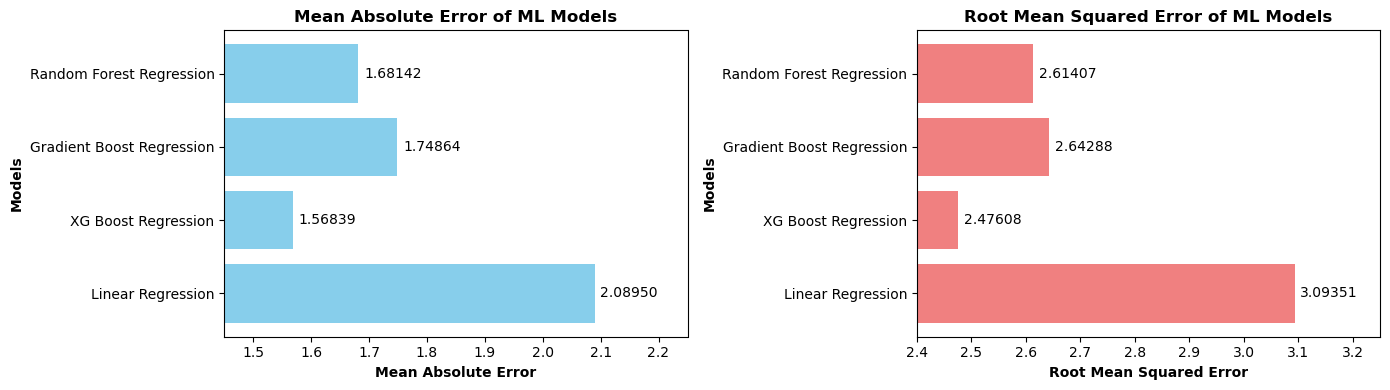

In [53]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Plot MAE
bars_mae = ax1.barh(list(model_mae.keys()), list(model_mae.values()), color='skyblue')
ax1.set_ylabel('Models', fontweight='bold')
ax1.set_xlabel('Mean Absolute Error', fontweight='bold')
ax1.set_title('Mean Absolute Error of ML Models', fontweight='bold')
ax1.set_xlim(1.45, 2.25)
for bar in bars_mae:
    width = bar.get_width()
    ax1.text(width + 0.01, bar.get_y() + bar.get_height()/2, '{:.5f}'.format(round(width, 5)), ha='left', va='center')

# Plot RMSE
bars_rmse = ax2.barh(list(model_rmse.keys()), list(model_rmse.values()), color='lightcoral')
ax2.set_ylabel('Models', fontweight='bold')
ax2.set_xlabel('Root Mean Squared Error', fontweight='bold')
ax2.set_title('Root Mean Squared Error of ML Models', fontweight='bold')
ax2.set_xlim(2.4, 3.25)
for bar in bars_rmse:
    width = bar.get_width()
    ax2.text(width + 0.01, bar.get_y() + bar.get_height()/2, '{:.5f}'.format(round(width, 5)), ha='left', va='center')

plt.tight_layout()
plt.show()

In [54]:
# predicting total fare
y_pred = xgb_model.predict(X_test)

max_fare = y_pred + 1.57
min_fare = y_pred - 1.57

# creating a dataframe with Actual Fare, Total Fare (↓), and Total Fare (↑)
df_combined = pd.DataFrame({
    'Actual Fare': y_test,
    'Predicted Fare': y_pred,
    'Max Fare': max_fare,
    'Min Fare': min_fare,
})

# rounding to 2 decimal places
df_combined['Predicted Fare'] = ((100 * df_combined['Predicted Fare'].round(2)).astype(int)) / 100
df_combined['Max Fare'] = ((100 * df_combined['Max Fare'].round(2)).astype(int)) / 100
df_combined['Min Fare'] = ((100 * df_combined['Min Fare'].round(2)).astype(int)) / 100

# displaying the first 10 rows
df_combined.head(10)

,Actual Fare,Predicted Fare,Max Fare,Min Fare
186639,6.50,7.74,9.31,6.17
91370,22.25,21.61,23.18,20.04
95464,7.30,7.37,8.93,5.80
10326,9.30,8.60,10.18,7.04
73504,14.00,11.96,13.53,10.39
157858,4.90,5.26,6.83,3.69
132356,22.25,19.81,21.38,18.24
67040,5.30,6.39,7.96,4.82
192114,11.30,9.10,10.68,7.54
16801,22.25,18.58,20.15,17.01


We have observed that our model delivers reliable fare predictions, even in the absence of **`traffic`** and **`weather`** data. Notably, the **`maximum`** and **`minimum`** fare values derived from our predictions serve as practical and valuable metrics for real-world applications.

# **⚡ Testing Model for Dynamic Nature**
We now check if out entire system can handle the **`dynamic`** nature of pricing system as we had aimed.

## **🚠 `Raw Input Format` to `Model Input Format`**

In [55]:
def preprocess_data(df):
    
    # drop unrequired columns
    df = df.drop(['Unnamed: 0', 'key'], axis=1)
    
    # parse date time
    df['datetime'] = pd.to_datetime(df['pickup_datetime'], utc=True)
    df['weekday'] = df['datetime'].dt.weekday
    df['date'] = df['datetime'].dt.day
    df['month'] = df['datetime'].dt.month
    df['year'] = df['datetime'].dt.year
    df['hour'] = df['datetime'].dt.hour
    df = df.drop(['pickup_datetime', 'datetime'], axis=1)
    
    # generate distnace
    df['distance'] = distance_transform(
    df['pickup_longitude'].to_numpy(), 
    df['pickup_latitude'].to_numpy(),
    df['dropoff_longitude'].to_numpy(), 
    df['dropoff_latitude'].to_numpy())
    
    # assigning pickup and dropoff box
    df['pickup'] = df.apply(lambda row: assign_box(row['pickup_latitude'], row['pickup_longitude'], box_size, pickup_mapping), axis=1)
    df['dropoff'] = df.apply(lambda row: assign_box(row['dropoff_latitude'], row['dropoff_longitude'], box_size, dropoff_mapping), axis=1)
    df = df.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis = 1)
    
    # simplifying hours, weekdays, date and months
    df['time'] = df['hour'].apply(categorize_hour)
    df = df.drop('hour', axis=1)    
    df['weekend'] = df['weekday'].isin([4, 5, 6]).astype(int)
    df = df.drop('weekday', axis=1)
    df['tri_monthly'] = df['date'].apply(categorize_date)
    df = df.drop('date', axis=1)    
    df['year_quater'] = df['month'].apply(categorize_month)
    df = df.drop('month', axis = 1)
    
    # encoding categorical columns
    for col, encoder in encoders.items():
        if col in df.columns:
            if col in ['year', 'passenger_count', 'pickup', 'dropoff']:
                df[col] = df[col].apply(lambda x: encoder.transform([x])[0] if x in encoder.classes_ else len(encoder.classes_))
            else:
                df[col] = df[col].apply(lambda x: encoder.transform([x])[0] if x in encoder.classes_ else None)

            
    # standardizing numerical columns
    for column, scaler in scalers.items():
        if col in num_col:
            df[col] = scaler.transform(df[[column]])
            
    df = df[['year', 'passenger_count', 'pickup', 'dropoff', 'time', 'weekend', 'year_quater', 'tri_monthly', 'distance']]
            
    return df

In [56]:
# predicting same ride at early morning
ride_data = [{
    'Unnamed: 0':  24983189,
    'key': '2021-06-17 02:22:06.0001103',
    'pickup_datetime': '2021-06-17 02:22:06 UTC',
    'pickup_longitude': -73.999817,
    'pickup_latitude': 40.738354,
    'dropoff_longitude': -73.999512,
    'dropoff_latitude': 40.723217,
    'passenger_count': 3
}]

ride_data = pd.DataFrame(ride_data)
data = preprocess_data(ride_data)
fare_predicted_emrng = xgb_model.predict(data)
print(f"Total fare for early morning UBER Ride: ${fare_predicted_emrng[0]:.2f}")

Total fare for early morning UBER Ride: $17.12


In [57]:
# predicting a ride for 3 people in evening
ride_data = [{
    'Unnamed: 0':  24983189,
    'key': '2021-06-17 19:22:06.0001103',
    'pickup_datetime': '2021-06-17 19:22:06 UTC',
    'pickup_longitude': -73.999817,
    'pickup_latitude': 40.738354,
    'dropoff_longitude': -73.999512,
    'dropoff_latitude': 40.723217,
    'passenger_count': 3
}]

ride_data = pd.DataFrame(ride_data)
data = preprocess_data(ride_data)
fare_predicted_evng = xgb_model.predict(data)
print(f"Total fare for evening UBER Ride: ${fare_predicted_evng[0]:.2f}")

Total fare for evening UBER Ride: $18.60


In [58]:
# predicting same ride at late night
ride_data = [{
    'Unnamed: 0':  24983189,
    'key': '2021-06-17 23:22:06.0001103',
    'pickup_datetime': '2021-06-17 23:22:06 UTC',
    'pickup_longitude': -73.999817,
    'pickup_latitude': 40.738354,
    'dropoff_longitude': -73.999512,
    'dropoff_latitude': 40.723217,
    'passenger_count': 3
}]

ride_data = pd.DataFrame(ride_data)
data = preprocess_data(ride_data)
fare_predicted_lnight = xgb_model.predict(data)
print(f"Total fare for late night UBER Ride: ${fare_predicted_lnight[0]:.2f}")

Total fare for late night UBER Ride: $17.86


- Plotting the results

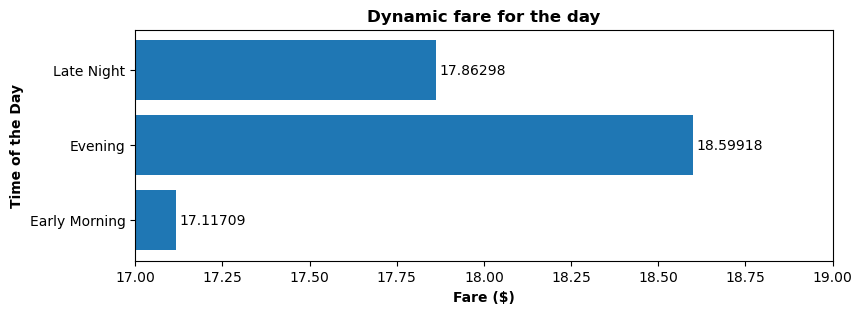

In [59]:
predicted_fare = {
    'Early Morning' : fare_predicted_emrng[0],
    'Evening' : fare_predicted_evng[0],
    'Late Night' : fare_predicted_lnight[0]
}

# Plotting model accuracies
plt.figure(figsize=(9, 3))
bars = plt.barh(list(predicted_fare.keys()), list(predicted_fare.values()))

# Adding annotations
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
             '{:.5f}'.format(round(width, 5)), 
             ha='left', 
             va='center'
)

plt.ylabel('Time of the Day', fontweight='bold')
plt.xlabel('Fare ($)', fontweight='bold')
plt.title('Dynamic fare for the day', fontweight='bold')
plt.xlim(17, 19)
plt.show()

# **🌟 Conclusion**

Thus, we can see that the system designed can automatically adjust the **`Total Fare`** for a ride from the same **`pickup`** to **`dropoff`** location with the same number of people, for different times of the day, acting as a smart and dynamic system.

# **🙏 THANK YOU**
---